In [30]:
# Figyelmeztetések warningok figyelemen kívül hagyása, vagyis ne kerüljön ki az outputra.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#csomagok betöltése
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
#import sklearn

#Ha mégis lenne warning üzenet, akkor run menüpont-> run all cells(ezt kétszer kell) és eltűnnek a warningok.

In [31]:
#fájlok beolvasása
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [32]:
#adatok kiírása
test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [33]:
train.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Hisztogrammok a train és a test adathalmaz esetén

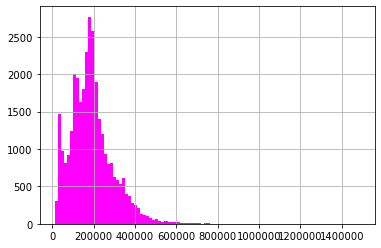

In [34]:
train['fnlwgt'].hist(bins=100, color = "magenta")
#plt.show()

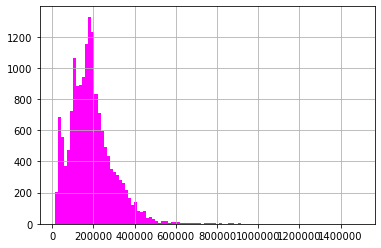

In [35]:
test['fnlwgt'].hist(bins=100, color = "magenta")
#plt.show()

# Nemek eloszlása Crosstab

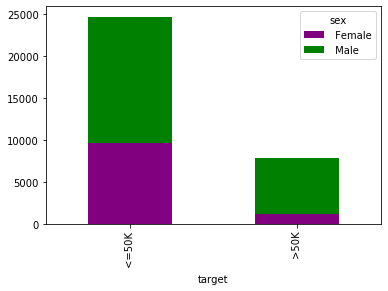

In [36]:
#crosstab a nemek eloszlására - train
fsc = pd.crosstab(train['target'], train['sex'])
fsc.plot(kind='bar', stacked=True, color=['purple','green'])
#plt.show()

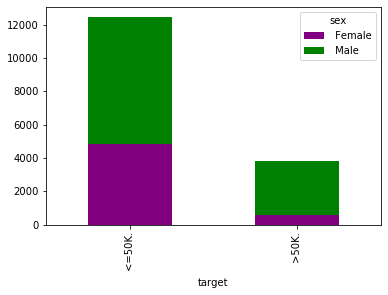

In [37]:
#crosstab a nemek eloszlására - test
fsc = pd.crosstab(test['target'], test['sex'])
fsc.plot(kind='bar', stacked=True, color=['purple','green'])
#plt.show()

# Dobozábrák kor alapján

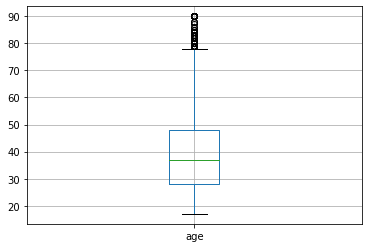

In [38]:
train.boxplot(column='age')
#plt.show()

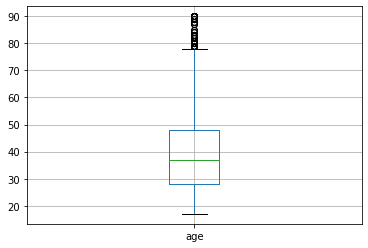

In [39]:
test.boxplot(column='age')
#plt.show()


## Szélsőértékek eltávolítása

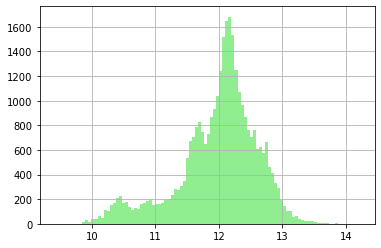

In [40]:
#Train-nél fnlwght szélsőértékeinek levágása
train['fnlwgt_log'] = np.log(train['fnlwgt'])
train['fnlwgt_log'].hist(bins=100, color = "lightgreen")
#plt.show()

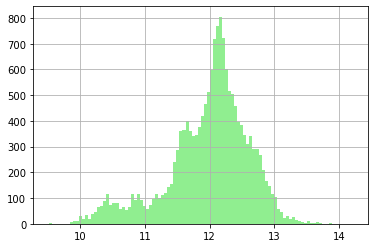

In [41]:
#Test-nél fnlwght szélsőértékeinek levágása
test['fnlwgt_log'] = np.log(test['fnlwgt'])
test['fnlwgt_log'].hist(bins=100, color = "lightgreen")
#plt.show()

## K-fold cross validation

In [42]:
#Hiányzó adatok feltöltése az első értékkel
test['workclass'].fillna(test['workclass'].mode()[0], inplace=True)
test['marital.status'].fillna(test['marital.status'].mode()[0], inplace=True)
test['occupation'].fillna(test['occupation'].mode()[0], inplace=True)
test['relationship'].fillna(test['relationship'].mode()[0], inplace=True)
test['race'].fillna(test['race'].mode()[0], inplace=True)
test['sex'].fillna(test['sex'].mode()[0], inplace=True)
test['native.country'].fillna(test['native.country'].mode()[0], inplace=True)

#float64 np verzióba alakítása
test['fnlwgt_log']=test['fnlwgt_log'].astype(np.float64)
train['fnlwgt_log']=train['fnlwgt_log'].astype(np.float64)
#del test['fnlwgt_log']
#del train['fnlwgt_log']

In [43]:
print ("Adatsorok fájtípusainak kiíratása a train adathalmazban")
train.dtypes

Adatsorok fájtípusainak kiíratása a train adathalmazban


age                 int64
workclass          object
fnlwgt              int64
education          object
education.num       int64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country     object
target             object
fnlwgt_log        float64
dtype: object

In [44]:
print ("Adatsorok fájtípusainak kiíratása a test adathalmazban")
test.dtypes

Adatsorok fájtípusainak kiíratása a test adathalmazban


age                 int64
workclass          object
fnlwgt              int64
education          object
education.num       int64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country     object
target             object
fnlwgt_log        float64
dtype: object

In [45]:
#nem szám típusok átalakítása szám típusúvá a test adathalmazban
from sklearn.preprocessing import LabelEncoder
var_mod_test = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country','target']

le_test = LabelEncoder()
for ii in var_mod_test:
    test[ii] = le_test.fit_transform(test[ii])
test.dtypes 

age                 int64
workclass           int64
fnlwgt              int64
education           int64
education.num       int64
marital.status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country      int64
target              int64
fnlwgt_log        float64
dtype: object

mint látható az object típusokat sikerült int64-es típusra állítani

In [46]:
#nem szám típusok átalakítása szám típusúvá a train adathalmazban
var_mod_train = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country','target']
le_train = LabelEncoder()
for ii in var_mod_train:
    train[ii] = le_train.fit_transform(train[ii].astype(str))
train.dtypes

age                 int64
workclass           int64
fnlwgt              int64
education           int64
education.num       int64
marital.status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country      int64
target              int64
fnlwgt_log        float64
dtype: object

Itt szintén eltűntek a nem kívánt object típusok

In [47]:
#kcross validáció függvény
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  
  #Pontosság kiiratása
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  kf = KFold(n_splits=5)
  error = []
  #for train, test in kf.split(data): #ebbe a sorba hiba van
  for train, test in kf.split(data):  #talán így jó
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  #Cross validáció eredmény
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  model.fit(data[predictors],data[outcome])


In [48]:
#Validáció meghívása csak az oktatásra
outcome_var = 'target'
model = LogisticRegression()
predictor_var = ['education.num']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 77.958%
Cross-Validation Score : 77.958%


In [49]:
#Összes változóval tesztelve
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['age','workclass','fnlwgt','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 99.997%
Cross-Validation Score : 85.805%


A 99%-os pontosság nem jó, mert túl van tanítva a modell. Ezért meg kell nézni, melyik adatsor milyen mértékben befolyásolja a predikciót.

In [50]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

fnlwgt            0.173714
age               0.148214
education.num     0.121875
capital.gain      0.118187
relationship      0.105505
hours.per.week    0.083157
occupation        0.065844
marital.status    0.065747
workclass         0.038493
capital.loss      0.036807
native.country    0.018089
race              0.013805
sex               0.010562
dtype: float64


Az első 5 elem határozza meg nagy hangsúllyal a pontosságot, ezért ezeket fogom vizsgálni. 

In [51]:
#a paramétereket tovább kell finomítani, hogy ne legyen túltanítva a modell.
model = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=20, max_features=2, min_samples_leaf=2)
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 88.041%
Cross-Validation Score : 84.681%


In [52]:
#Immár sikerült elhárítani a túltanítottságot, ennek köszönhetően a tanuló algoritmus egész jó becsléseket tud adni.
#n_estimators = A fák száma
#min_samples_split = minimális felosztású minta
#max_depth = A fa maximális mélysége
#max_features = a legjobb felosztáshoz való számok
#min_samples_leaf = minimum levelek száma

Más modellek alkalmazása:
Logisztikus regresszió

In [53]:
outcome_var = 'target'
model = LogisticRegression()
predictor_var = ['age']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 74.681%
Cross-Validation Score : 74.700%


In [54]:
#szintén logisztikus regresszió viszont most az öt legjelentősebb paraméterrel
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 79.466%
Cross-Validation Score : 79.383%


Döntési fa

In [55]:
# Decision Tree
# provide higher accuracy than logistic regression model
model = DecisionTreeClassifier()
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train ,predictor_var, outcome_var)

Accuracy : 99.674%
Cross-Validation Score : 79.528%


In [56]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 84.432%
Cross-Validation Score : 84.279%


A 100% pontosság lecsökkent 80% alá, de eközben a cross validációs érték megnőtt kb 2%-al ami jó.

Random forest

In [57]:
# Random Forest
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['age','workclass','fnlwgt','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 99.991%
Cross-Validation Score : 85.744%


A 100% pontosság itt sem elvárt érték ezért a k-fold esetéhez hasonlóan itt is finomítani kell

In [58]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['fnlwgt','age','capital.gain','education.num','relationship']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 84.497%
Cross-Validation Score : 84.352%


A pontosság csökkenésével a cross validáció is hasonló léptékben csökkent, a döntési fánál sikerült a elérni a kitűzött célt, vagyis a 100% pontosság csökenése a cross validáció emelkedését is okozta a finomítás.